In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
mapping = {
    0: [[0, 12, 24], 'January'],
    1: [[1, 13, 25], 'February'],
    2: [[2, 14, 26], 'March'],
    3: [[3, 15, 27], 'April'],
    4: [[4, 16, 28], 'May'],
    5: [[5, 17, 29], 'June'],
    6: [[6, 18, 30], 'July'],
    7: [[7, 19, 31], 'August'],
    8: [[8, 20, 32], 'September'],
    9: [[9, 21, 33], 'October'],
    10: [[10, 22, 34], 'November'],
    11: [[11, 23, 35], 'December'],
}

In [46]:
data_train = pd.read_csv('../data_cleaned/data_train.csv')
item_categories = pd.read_csv('../data_cleaned/item_categories.csv')
items = pd.read_csv('../data_cleaned/items.csv')
shops = pd.read_csv('../data_cleaned/shops.csv')

In [47]:
data_train = data_train.groupby(['shop_id','item_id','date_block_num']).agg({'item_cnt_day':'sum','item_price':'mean'}).reset_index()
data_train=data_train.rename(columns={'item_cnt_day':'item_cnt_month'})



In [48]:
merged = data_train.merge(items, how='left').merge(item_categories, how='left').merge(shops, how='left')
merged.isna().sum()

shop_id               0
item_id               0
date_block_num        0
item_cnt_month        0
item_price            0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [49]:
def parse_city(shop_name):
    if shop_name.split()[0] == '!Якутск':
        return  'Якутск'

    if shop_name.split()[0] == 'Сергиев':
            return  'Сергиев Посад'
    else:
        return shop_name.split()[0]

def supercategory(name):
    return name.split()[0]

In [50]:
merged['city'] = merged['shop_name'].apply(parse_city)
merged['city'].unique()

array(['Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж', 'Выездная',
       'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга', 'Коломна',
       'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара',
       'Сергиев Посад', 'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки',
       'Цифровой', 'Чехов', 'Якутск', 'Ярославль'], dtype=object)

In [51]:
merged['super_category'] = merged['item_category_name'].apply(supercategory)
merged['super_category'].unique()

array(['Игры', 'Кино', 'Музыка', 'Книги', 'Программы', 'Подарки', 'Карты',
       'Аксессуары', 'Игровые', 'Билеты', 'Чистые', 'Служебные',
       'Элементы', 'Доставка', 'PC'], dtype=object)

In [52]:
merged['month'] = merged['date_block_num'] % 12
merged['year'] = merged['date_block_num'] // 12 + 2013

In [53]:
merged['city_num'] = merged['city'].astype('category')
merged['super_category_num'] = merged['super_category'].astype('category')
merged['city_num'] = merged['city_num'].cat.codes
merged['super_category_num'] =  merged['super_category_num'].cat.codes

In [54]:
#sns.heatmap(merged.drop(['item_name','item_category_name','shop_name','city','super_category'], axis=1).corr(),annot=True,annot_kws={'fontsize':7})

PLOT GENERAL TENDECIES

In the plot below we can see, that there is the deacreasing trend for sales

Also we can see, that data have similar behavior during different years

Text(0.5, 1.0, 'Sales trend')

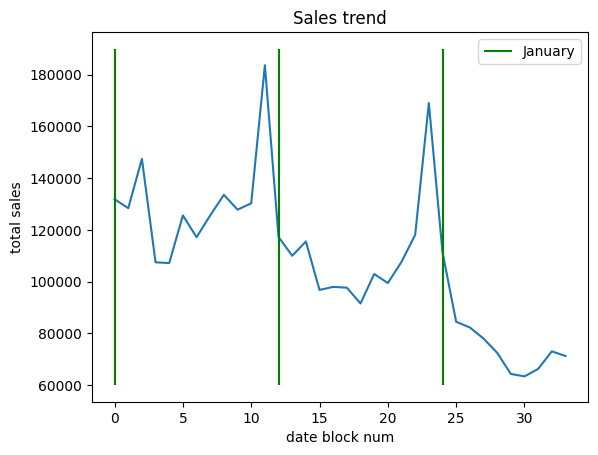

In [55]:
sales_dbn = merged.groupby('date_block_num').agg({'item_cnt_month':'sum'}).reset_index()
plt.plot(sales_dbn['date_block_num'], sales_dbn['item_cnt_month'])
plt.xlabel('date block num')
plt.ylabel('total sales')
plt.vlines([0,12,24], ymin=60000,ymax=190000,label='January',color='green')
plt.legend()
plt.title('Sales trend')

In the plot below we can see, that there is the increasing trend for price


Text(0.5, 1.0, 'Price trend')

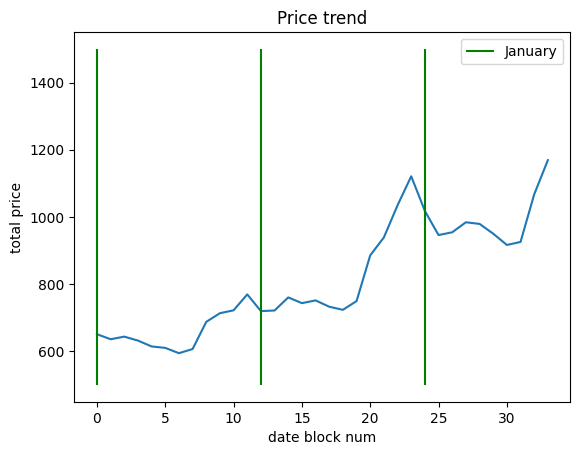

In [56]:
sales_dbn = merged.groupby('date_block_num').agg({'item_price':'mean'}).reset_index()
plt.plot(sales_dbn['date_block_num'], sales_dbn['item_price'])
plt.xlabel('date block num')
plt.ylabel('total price')
plt.vlines([0,12,24], ymin=500,ymax=1500,label='January',color='green')
plt.legend()

plt.title('Price trend')
#In the plot below we can see, that there is the increasing trend 

In [57]:
gr_month = merged.groupby(['month','year']).agg({'item_cnt_month':'sum'}).reset_index()

In the plot below we can see, that there is some month seasonality
For example, sales increase in December

Text(0.5, 1.0, 'Sales per year')

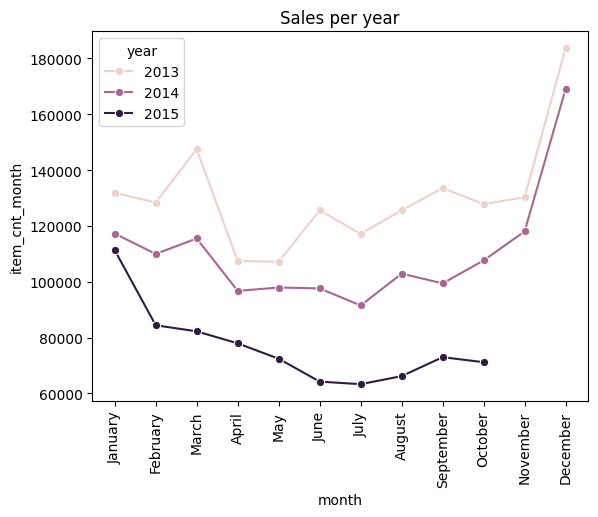

In [58]:
sns.lineplot(x='month', y='item_cnt_month', hue='year', data=gr_month, marker='o')
plt.xticks(ticks=[m for m in mapping.keys()],labels=[m[1] for m in mapping.values()], rotation='vertical');
plt.title('Sales per year')

In the plot below we can see, that different super categories have different sales

Only few super categories have been chosen for plotting to make plot more clear

Text(0.5, 1.0, 'Sales per super category')

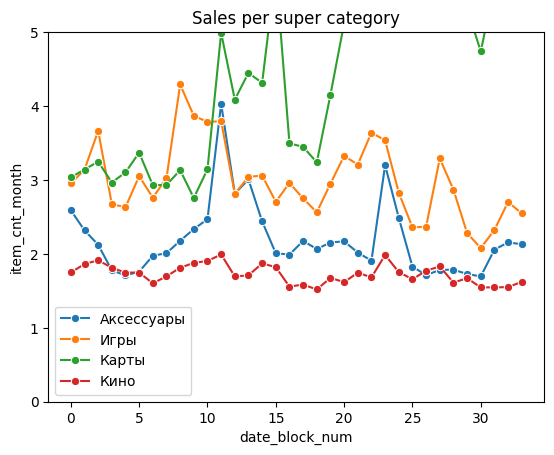

In [60]:
gr_sup_cat = gr_month = merged.groupby(['date_block_num','super_category']).agg({'item_cnt_month':'mean'}).reset_index()
sup_cats_to_draw = ['Кино','Карты','Игры','Аксессуары']
gr_sup_cat = gr_sup_cat[gr_sup_cat['super_category'].isin(sup_cats_to_draw)]
sns.lineplot(x='date_block_num', y='item_cnt_month', hue='super_category', data=gr_sup_cat, marker='o')
plt.xlabel('sales')
plt.xlabel('date_block_num')
plt.legend()
plt.ylim(0,5)
plt.title('Sales per super category')


Boxplots for different super categories. Outlier exploration you may see in EDA_anomalies.ipynb notebook

/tmp/ipykernel_200661/918557995.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(gr_sup_cat['super_category'], rotation=90)
/tmp/ipykernel_200661/918557995.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(gr_sup_cat['super_category'], rotation=90)


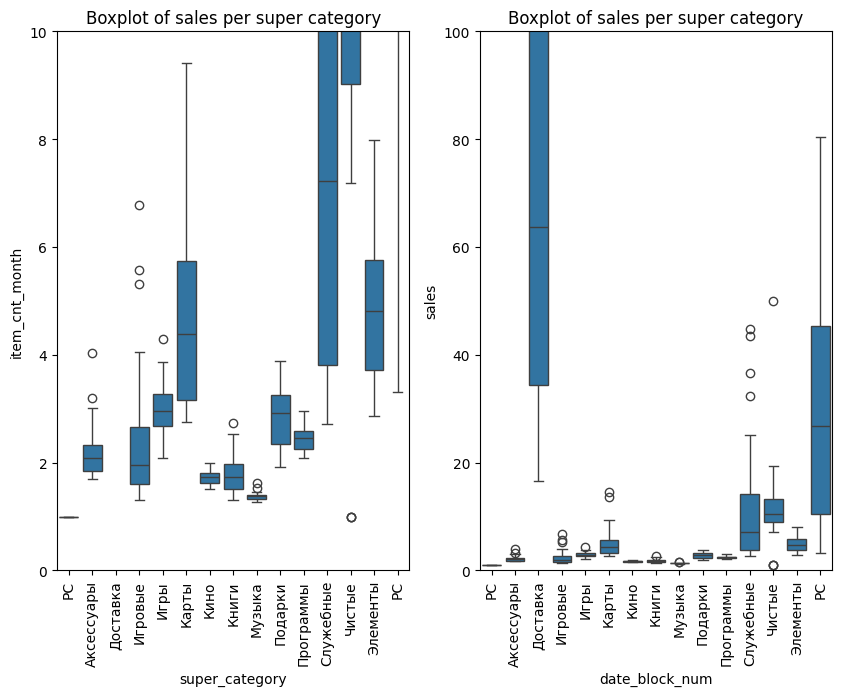

In [61]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
gr_sup_cat =  merged.groupby(['date_block_num','super_category']).agg({'item_cnt_month':'mean'}).reset_index()
sup_cats_to_draw = ['Кино','Карты','Игры','Аксессуары']
#gr_sup_cat = gr_sup_cat[gr_sup_cat['super_category'].isin(sup_cats_to_draw)]
sns.boxplot(x='super_category', y='item_cnt_month', data=gr_sup_cat, ax=ax[0])
ax[0].set_ylim(0,10)
ax[0].set_xticklabels(gr_sup_cat['super_category'], rotation=90)
ax[0].set_title('Boxplot of sales per super category')


sns.boxplot(x='super_category', y='item_cnt_month', data=gr_sup_cat, ax=ax[1])
ax[1].set_ylim(0,100)
ax[1].set_xticklabels(gr_sup_cat['super_category'], rotation=90)
ax[1].set_title('Boxplot of sales per super category')

plt.ylabel('sales')
plt.xlabel('date_block_num');




In plots below we can see, that different categories have different sales distribution even if they belong to the same super category

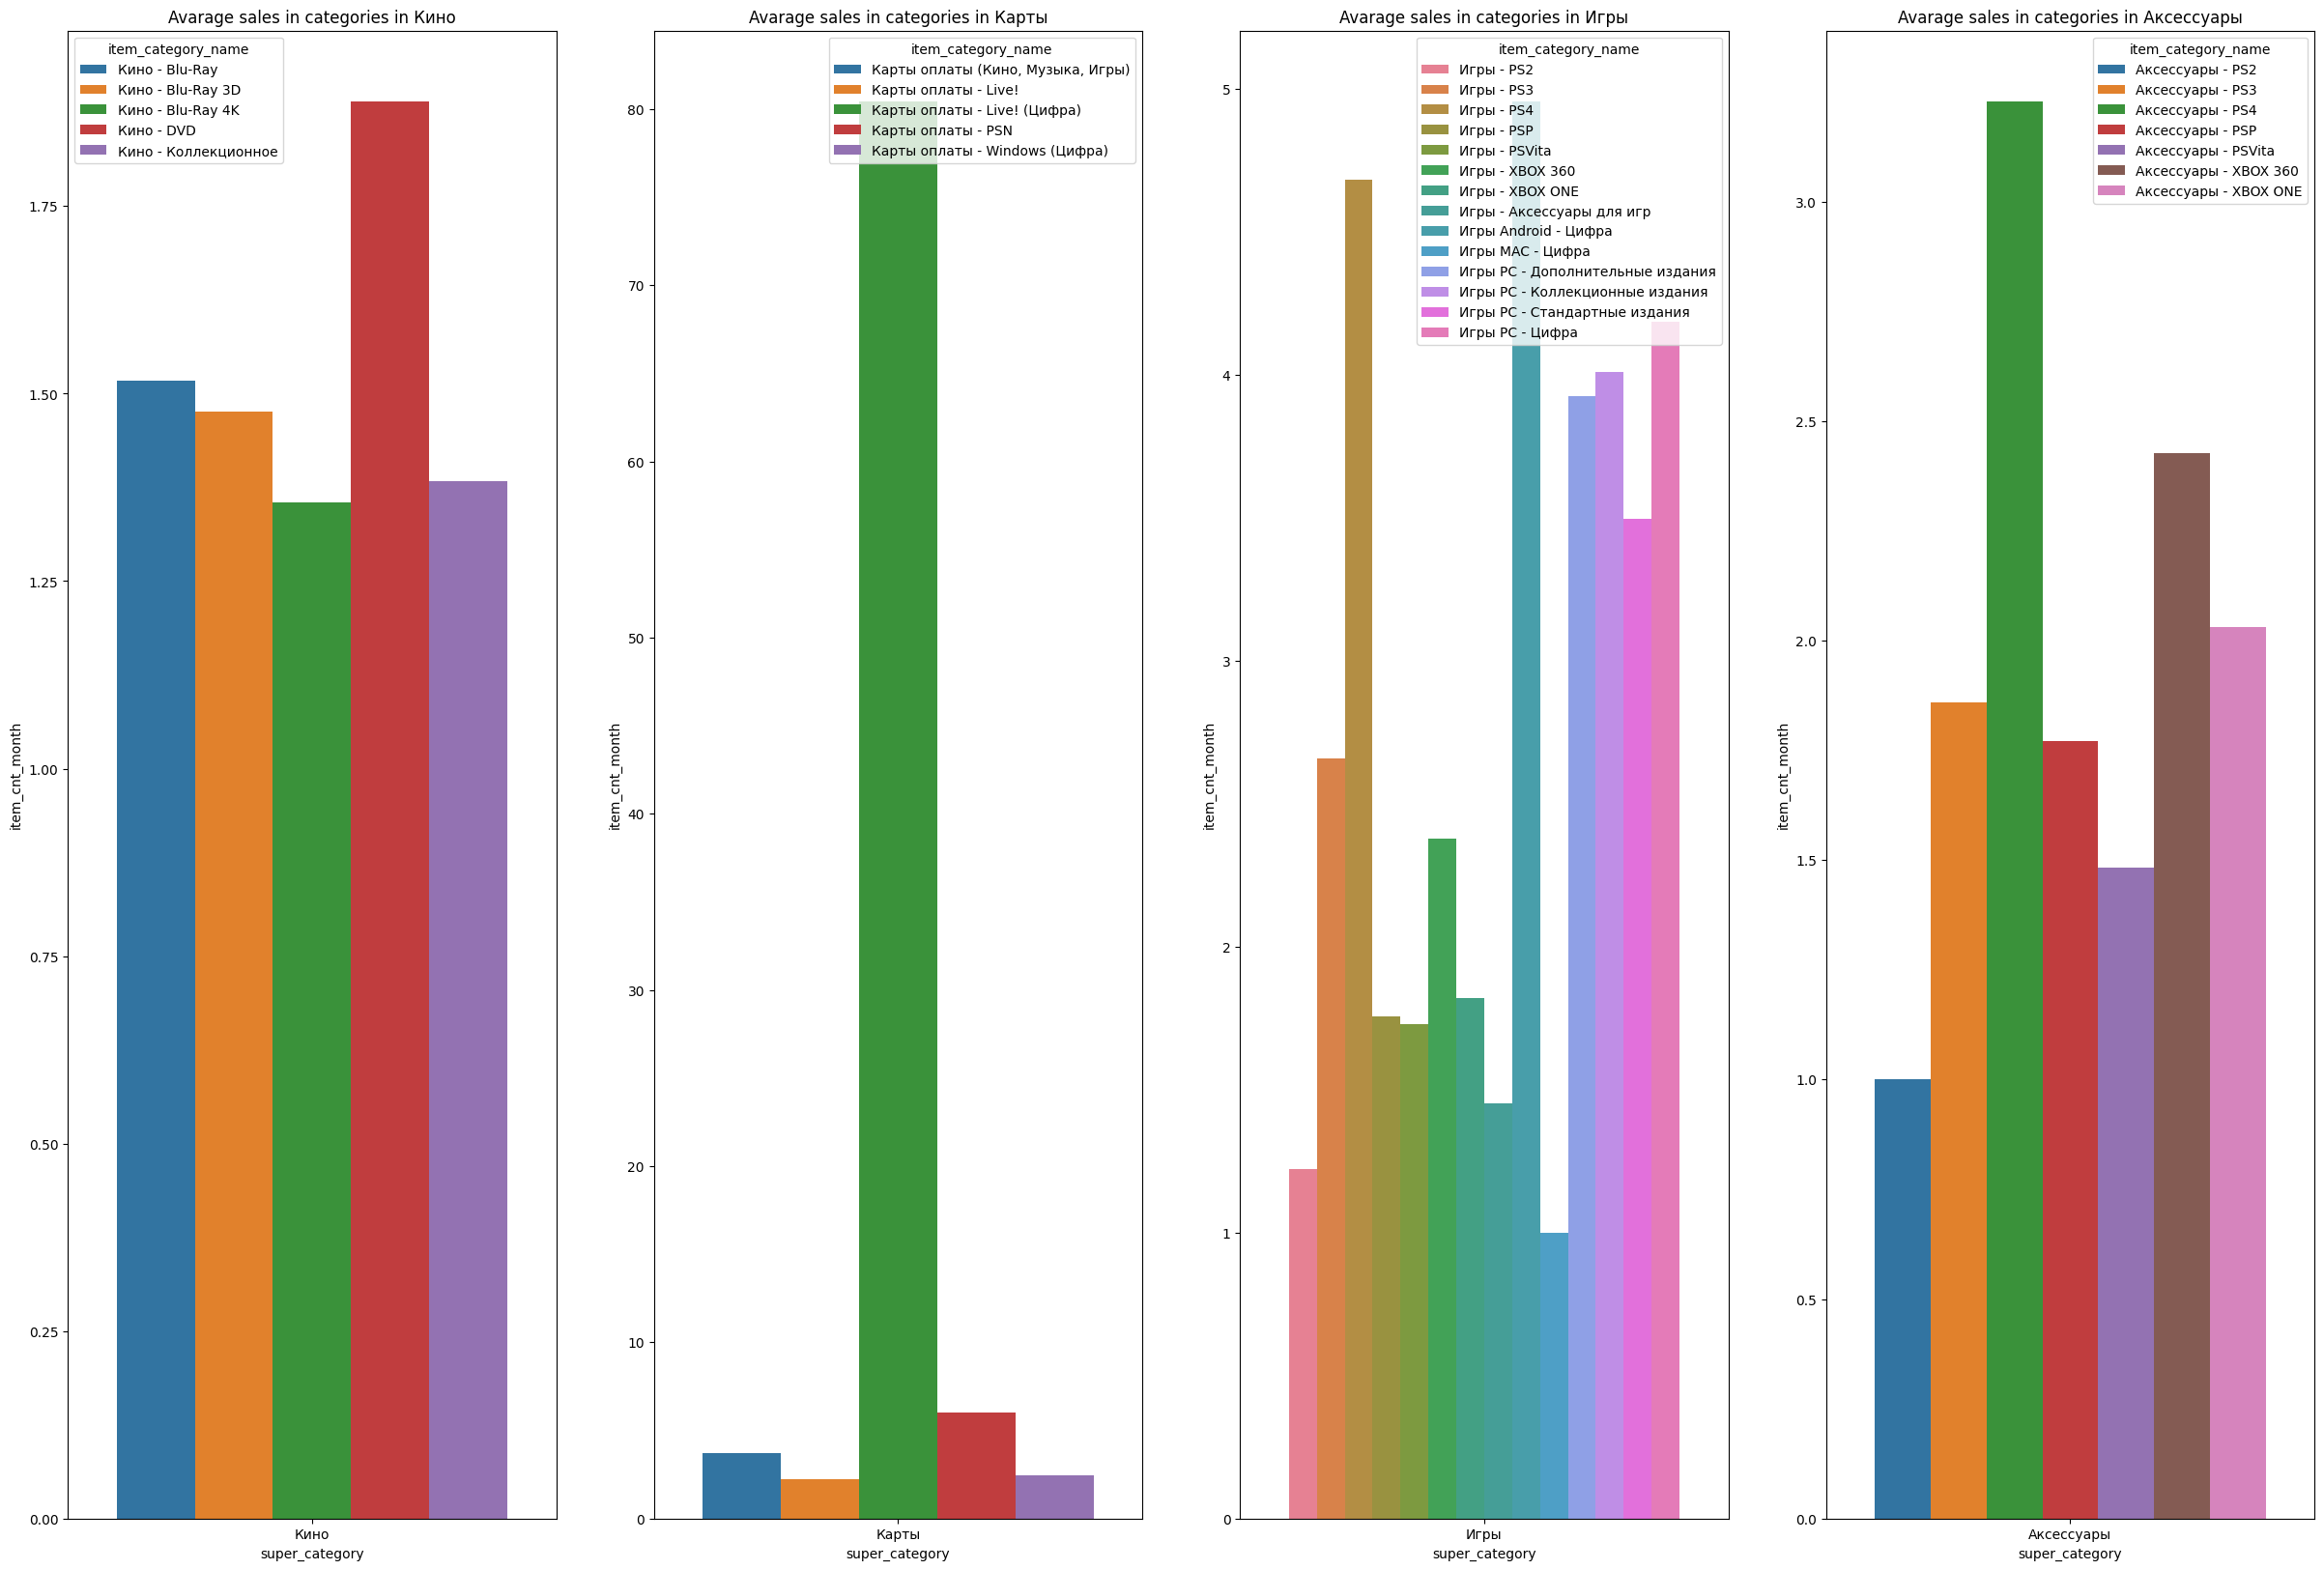

In [64]:
sup_cats_to_draw=['Кино','Карты','Игры','Аксессуары']
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))
for i in range(4):
    selected = merged[merged['super_category'] == sup_cats_to_draw[i]].groupby(['item_category_name','super_category'])['item_cnt_month'].mean().reset_index()
    sns.barplot(selected,  x="super_category", y="item_cnt_month", hue="item_category_name",ax=ax[i])
    ax[i].set_title(f'Avarage sales in categories in { sup_cats_to_draw[i]}');



Text(0.5, 1.0, 'Number of categories in each super category')

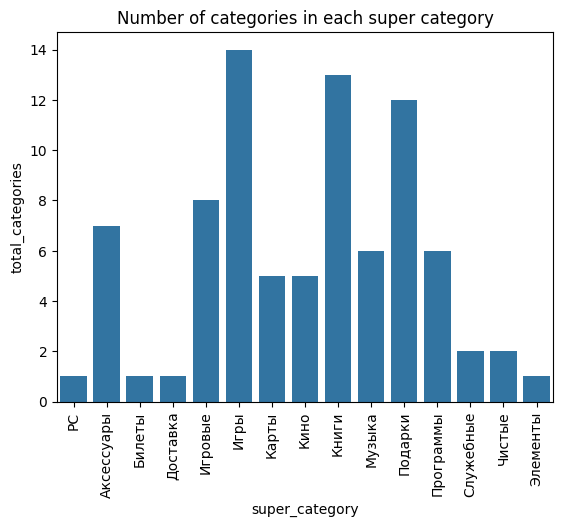

In [65]:
gr_sup_cat = merged.groupby('super_category').agg({'item_category_name':'unique'}).reset_index()
gr_sup_cat['total_categories'] = gr_sup_cat['item_category_name'].apply(len)
sns.barplot(gr_sup_cat,  x="super_category", y="total_categories")
plt.xticks(rotation='vertical');
plt.title('Number of categories in each super category')

In the plot below we can see, that different cities have different sales

Only few cities have been chosen for plotting to make plot more clear

Text(0.5, 1.0, 'Sales per city')

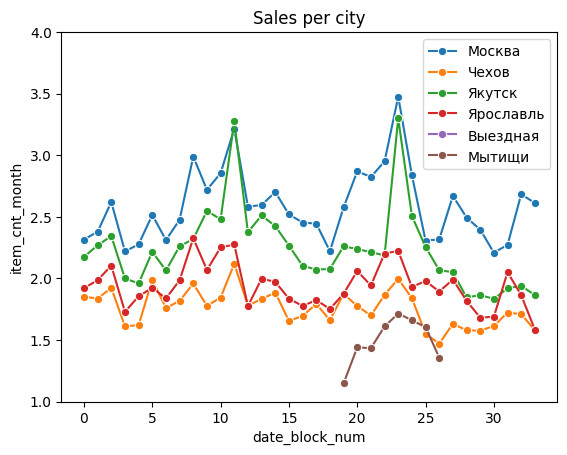

In [66]:
gr_city = merged.groupby(['date_block_num','city']).agg({'item_cnt_month':'mean'}).reset_index()
gr_city_to_draw = ['Ярославль','Выездная', 'Москва','Якутск','Мытищи','Чехов']
gr_city = gr_city[gr_city['city'].isin(gr_city_to_draw)]
sns.lineplot(x='date_block_num', y='item_cnt_month', hue='city', data=gr_city, marker='o')
plt.xlabel('sales')
plt.xlabel('date_block_num')
plt.legend()
plt.ylim(1,4)

plt.title('Sales per city')
#In the plot below we can see, that different cities have different sales
#Only few cities have been chosen for plotting to make plot more clear


Boxplots for different cities. Outlier exploration you may see in EDA_anomalies.ipynb notebook

/tmp/ipykernel_200661/488482695.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = ax.get_yticklabels(),fontdict={'fontsize':20});
/tmp/ipykernel_200661/488482695.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=90,fontdict={'fontsize':20});
/tmp/ipykernel_200661/488482695.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = ax.get_yticklabels(),fontdict={'fontsize':20});


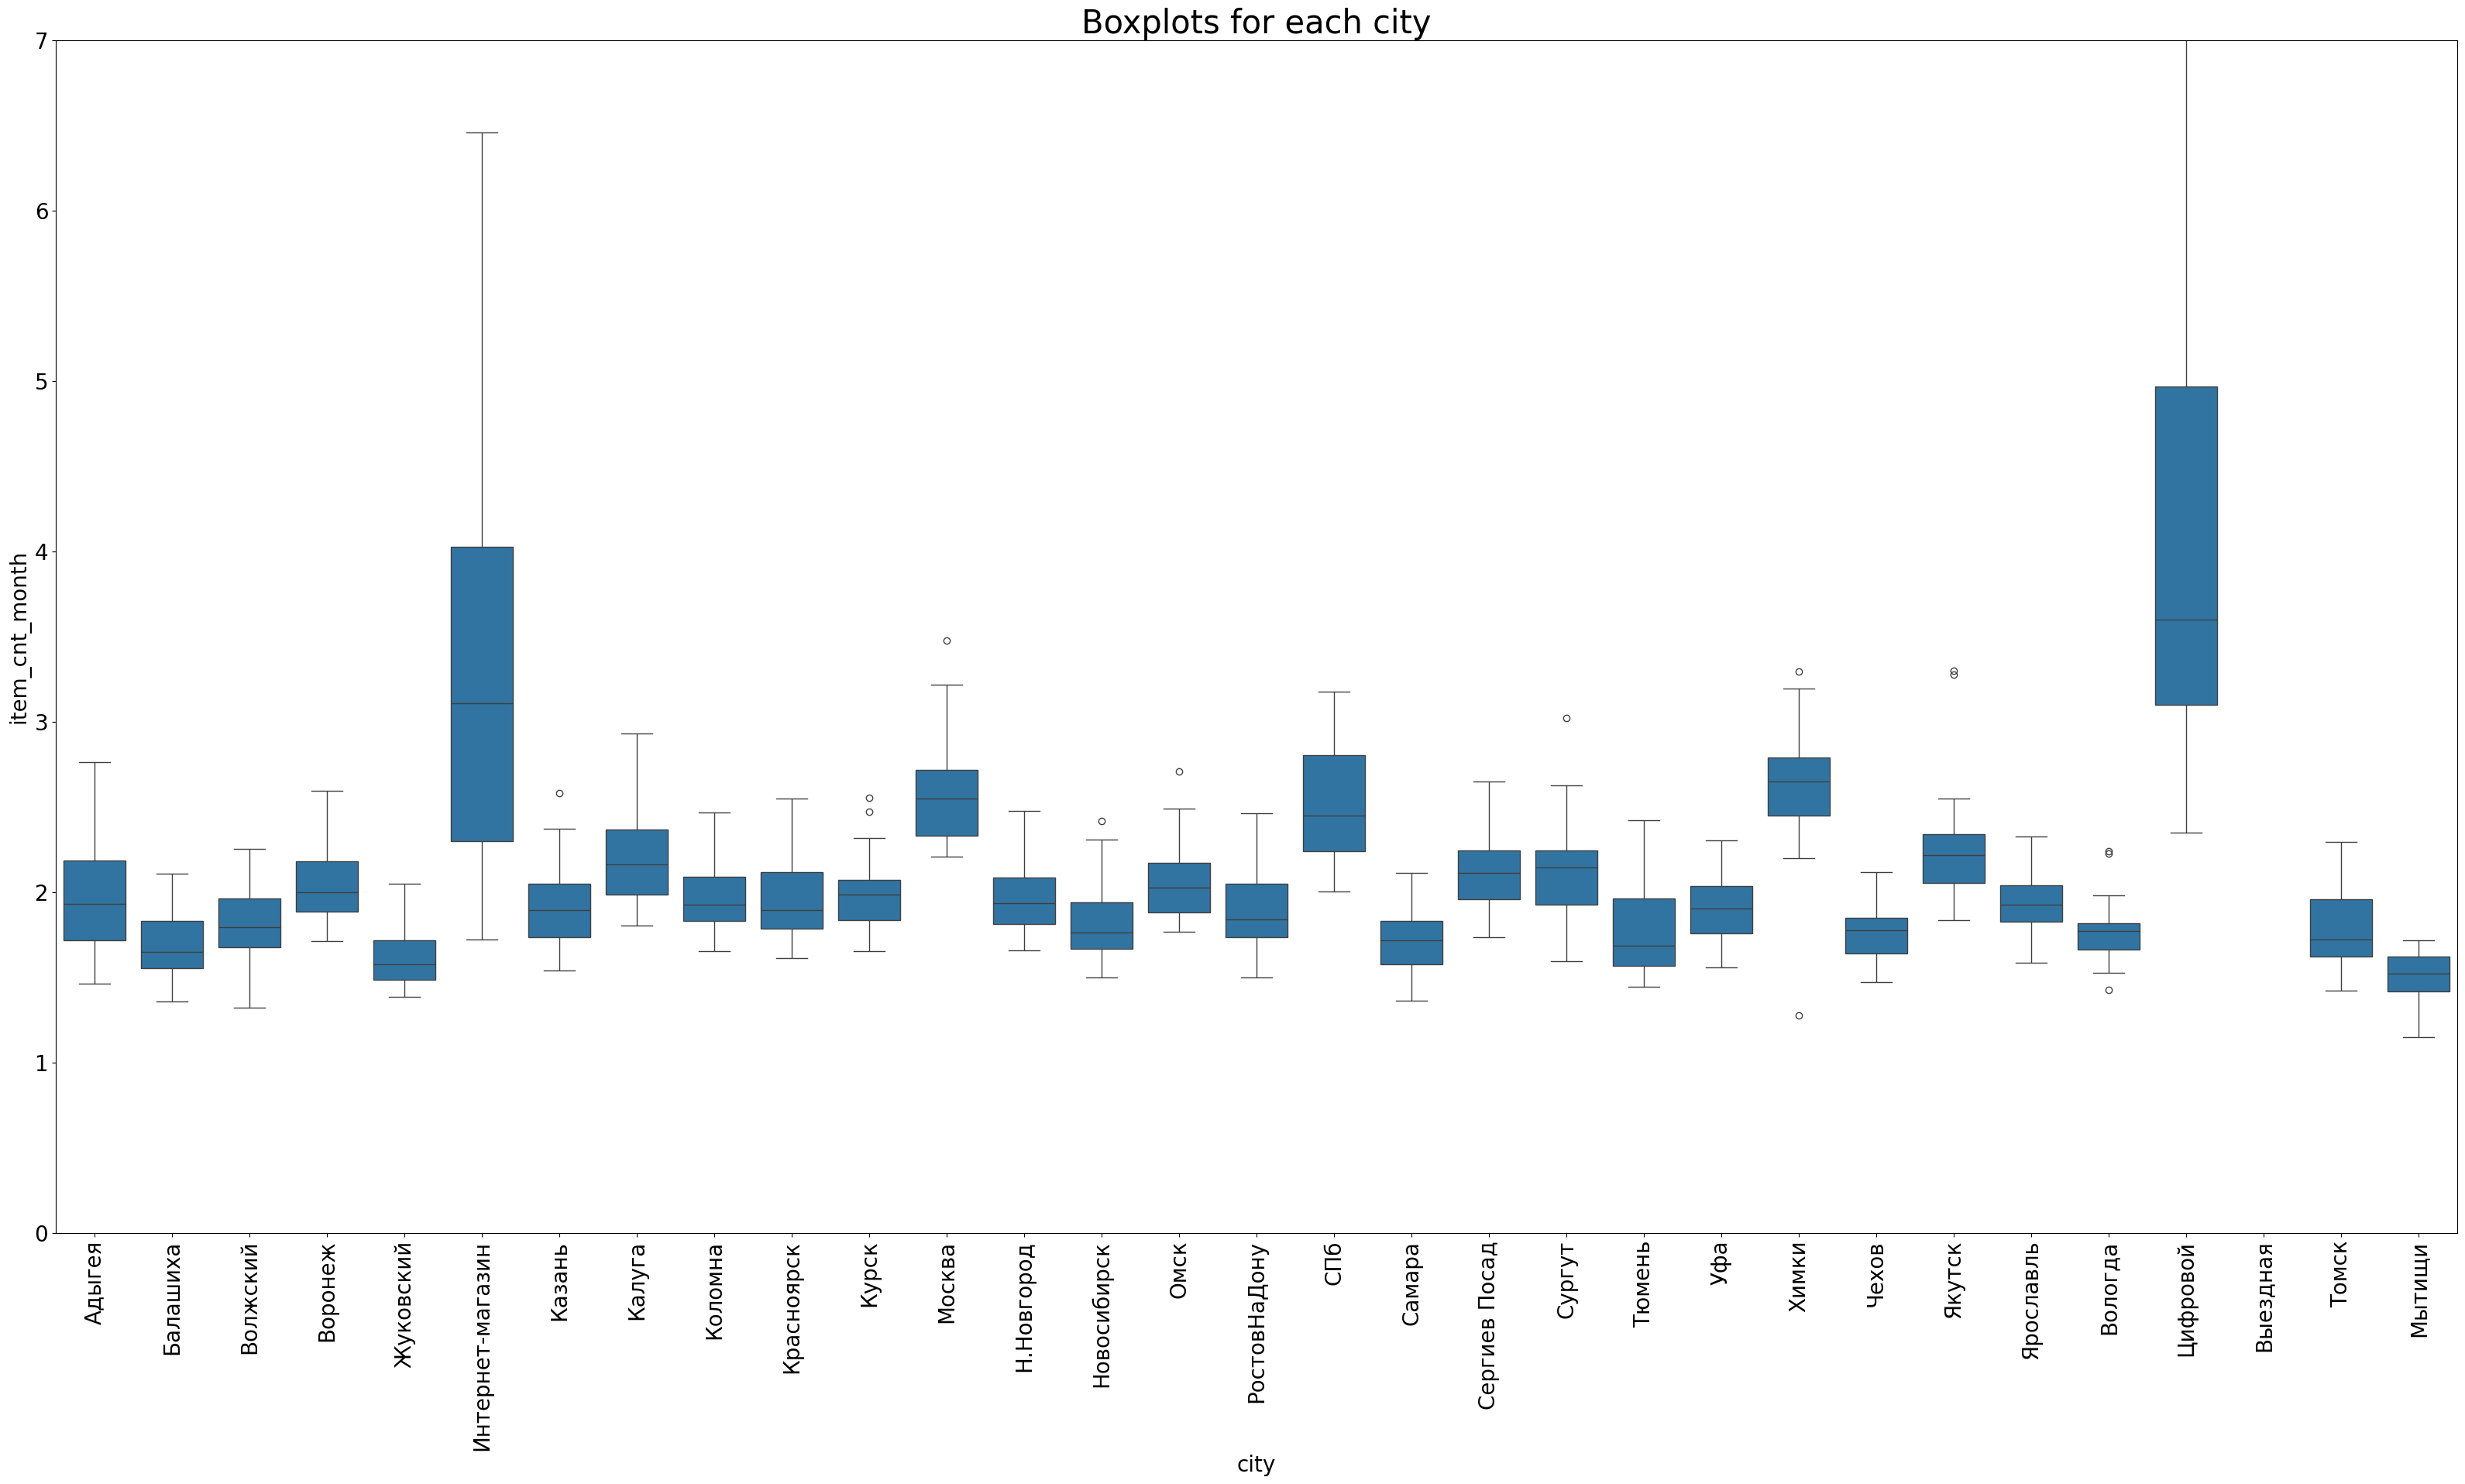

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40,20))
gr_sup_cat = gr_month = merged.groupby(['date_block_num','city']).agg({'item_cnt_month':'mean'}).reset_index()

gr_city_to_draw = ['Ярославль','Выездная', 'Москва','Якутск','Мытищи','Чехов']
#gr_sup_cat = gr_sup_cat[gr_sup_cat['super_category'].isin(sup_cats_to_draw)]
sns.boxplot(x='city', y='item_cnt_month', data=gr_sup_cat, ax=ax)
ax.set_ylim(0,7)

ax.set_xlabel('city', fontdict={'fontsize':20})
ax.set_ylabel('item_cnt_month', fontdict={'fontsize':20})

ax.set_yticklabels(labels = ax.get_yticklabels(),fontdict={'fontsize':20});
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=90,fontdict={'fontsize':20});
ax.set_yticklabels(labels = ax.get_yticklabels(),fontdict={'fontsize':20});

ax.set_title('Boxplots for each city', fontsize=30);

In the plot below we can see, that target distribution may is different for different shops even they belong to the same city 

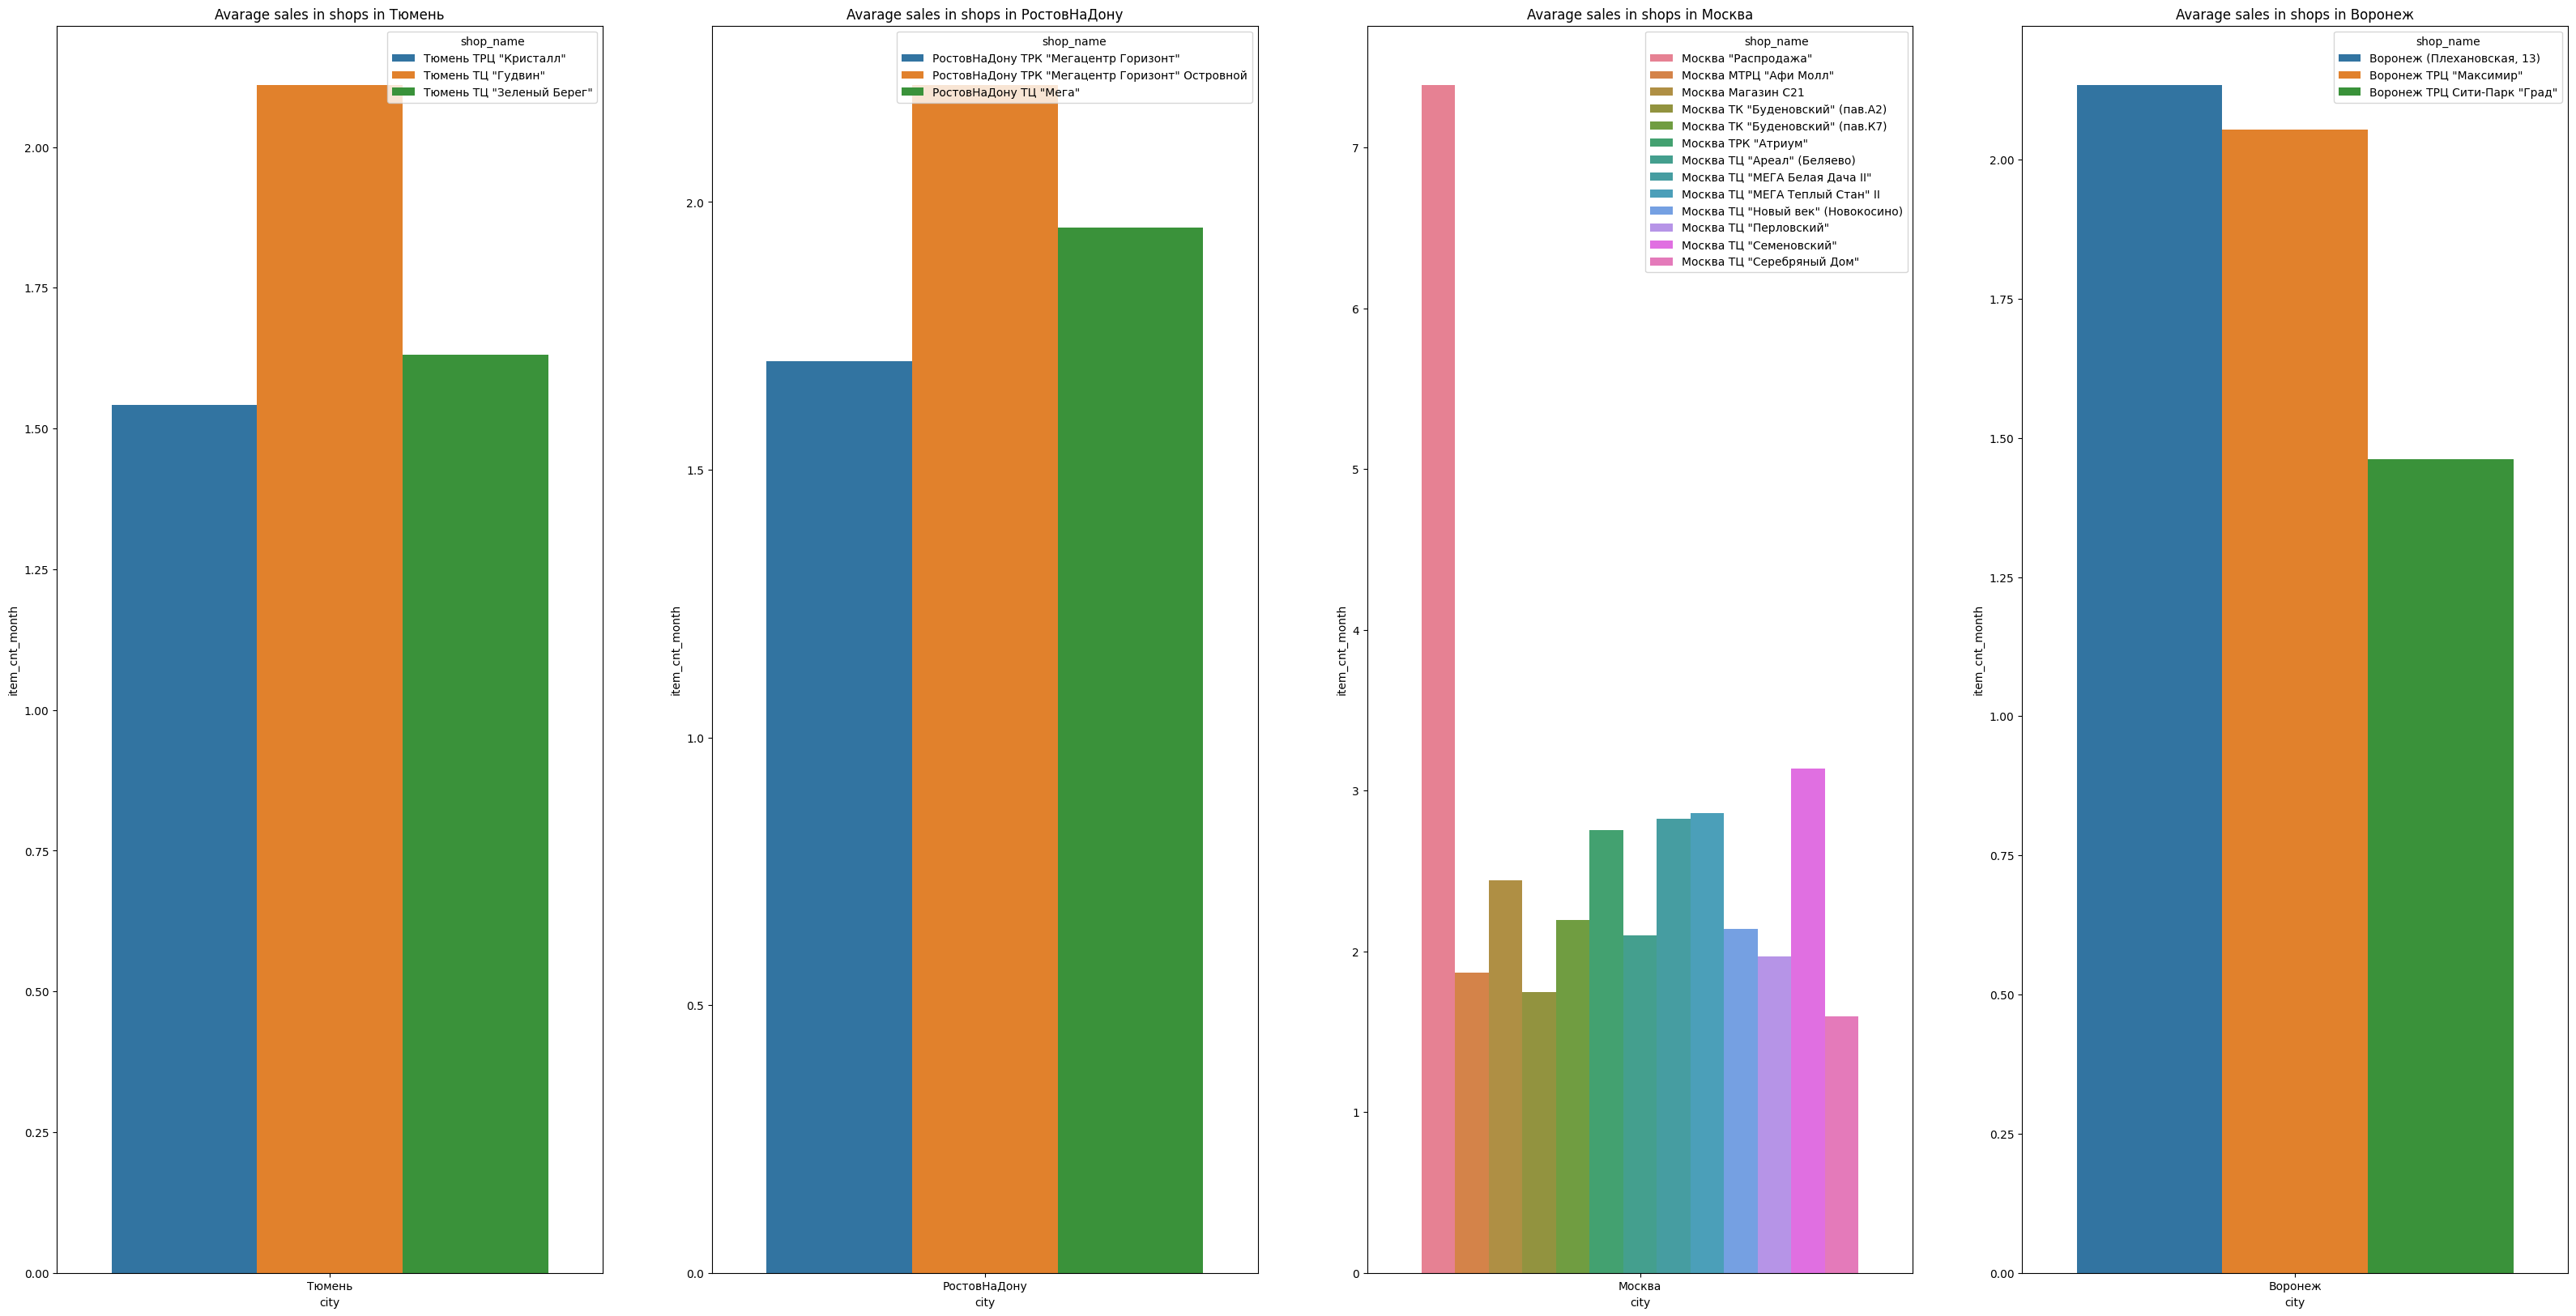

In [76]:
gr_city_to_draw = ['Тюмень','РостовНаДону', 'Москва','Воронеж']
merged['shop_name'] = merged.merge(shops)['shop_name']
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(40,20))
for i in range(4):
    selected = merged[merged['city'] == gr_city_to_draw[i]].groupby(['shop_name','city'])['item_cnt_month'].mean().reset_index()
    sns.barplot(selected,  x="city", y="item_cnt_month", hue="shop_name",ax=ax[i])
    ax[i].set_title(f'Avarage sales in shops in {gr_city_to_draw[i]}');

Text(0.5, 1.0, 'Number of shops in each city')

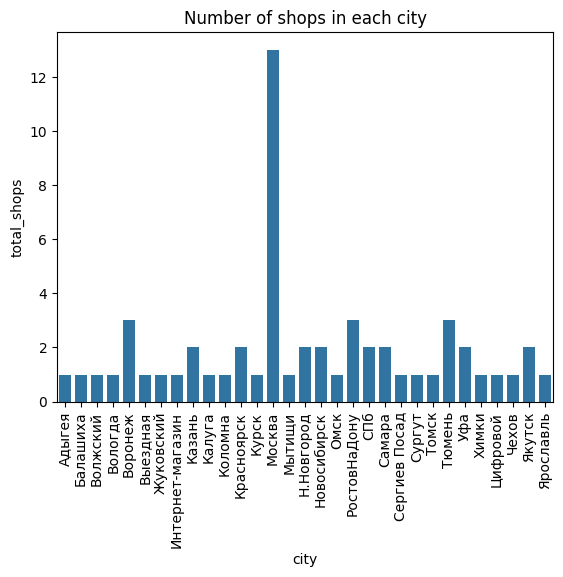

In [77]:
gr_sup_cat = merged.groupby('city').agg({'shop_name':'unique'}).reset_index()
gr_sup_cat['total_shops'] = gr_sup_cat['shop_name'].apply(len)
sns.barplot(gr_sup_cat,  x="city", y="total_shops")
plt.xticks(rotation='vertical'); 
plt.title('Number of shops in each city')

In [78]:

def create_lags(data,item_lags=None,price_lags=None):
    lagged_items = data[['date_block_num','item_cnt_month','shop_id','item_id']].copy()
    for lag in item_lags:
        lagged_items['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_items, how='left',on=['date_block_num','shop_id','item_id'], suffixes=('', f'_lag_{lag}'))
        lagged_items['date_block_num']-=lag

    lagged_prices = data[['date_block_num','item_price','shop_id','item_id']].copy()
    for lag in price_lags:
        lagged_prices['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_prices, how='left',on=['date_block_num','shop_id','item_id'], suffixes=('', f'_lag_{lag}'))
        lagged_prices['date_block_num']-=lag

        
    return data

In [79]:
def create_last_seen(data):#Takes some minutes
    prevs=data.groupby(['item_id'])['date_block_num'].unique().rename('blocks')
    mer = data.merge(prevs, how='left', on='item_id')
    for idx in range(len(mer)):
        curr =  mer.loc[idx,'blocks'] 
        
        prevs = np.array(curr) < mer.loc[idx,'date_block_num']
    
        if sum(prevs) == 0:
            mer.loc[idx,'blocks'] = -1
        else:
            mer.loc[idx,'blocks'] = curr [prevs] .max()

    data['last_seen'] = mer['blocks']
    return data


In [80]:
last_seen = create_last_seen(merged)#~8m 40s

In [81]:
last_seen = last_seen.where(last_seen['last_seen'] != -1, last_seen['date_block_num'],axis=0) 
last_seen['dbn_diff'] = last_seen['date_block_num'] - last_seen['last_seen']

In [82]:
dbn_diff_cnt = last_seen.groupby(['dbn_diff']).agg({'item_cnt_month':'mean'}).reset_index()

Plot below shows relationship between monthes since item have been sold first time and target

Here we can see, that items on avarege have most sales when they entry market

Text(0.5, 1.0, 'Relationship between sales and time that item is on the market')

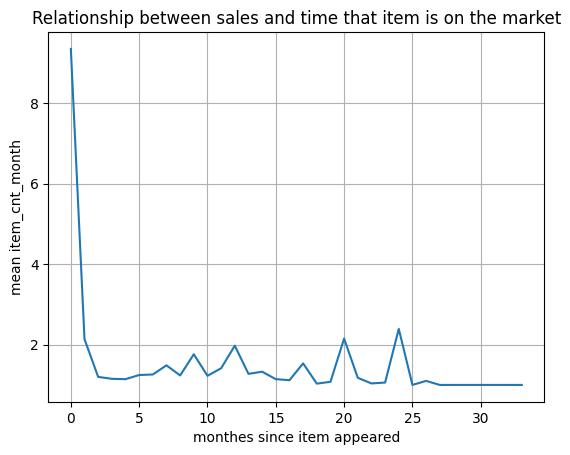

In [90]:
plt.plot(dbn_diff_cnt['dbn_diff'], dbn_diff_cnt['item_cnt_month'])
plt.xlabel('monthes since item appeared')
plt.ylabel('mean item_cnt_month')
plt.grid(True)

plt.title('Relationship between sales and time that item is on the market')


In [84]:
lagged = create_lags(merged,item_lags=[1,2],price_lags=[1,2])


In [85]:

lagged_filtered=lagged[~(lagged.isna().sum(axis=1) > 0)].copy()
lagged_filtered['price_change'] = lagged_filtered['item_price_lag_1'] - lagged_filtered['item_price_lag_2'] 
lagged_filtered['item_month_cnt_change'] = lagged_filtered['item_cnt_month_lag_1'] - lagged['item_cnt_month_lag_2'] 


In [86]:
real_diff_cnt = lagged_filtered['item_cnt_month'] - lagged_filtered['item_cnt_month_lag_1'] 
real_diff_cnt=real_diff_cnt.rename('real_diff_cnt')
real_diff_price = lagged_filtered['item_price'] - lagged_filtered['item_price_lag_1']
real_diff_price=real_diff_price.rename('real_diff_price')

Table and plot below show, that there is some dependency between item and price changes from month to month

In [87]:
df = pd.concat([real_diff_cnt,real_diff_price, lagged_filtered['item_month_cnt_change'],lagged_filtered['price_change'] ],axis=1)
df.columns= ['cnt_difference_between_current_and_previous',\
             'price_difference_between_current_and_previous',\
             'cnt_difference_between_lag1_and_lag2',\
             'price_difference_between_lag1_and_lag2']
df.corr()

,cnt_difference_between_current_and_previous,price_difference_between_current_and_previous,cnt_difference_between_lag1_and_lag2,price_difference_between_lag1_and_lag2
cnt_difference_between_current_and_previous,1.000000,-0.053435,-0.170517,0.005761
price_difference_between_current_and_previous,-0.053435,1.000000,0.029886,-0.194546
cnt_difference_between_lag1_and_lag2,-0.170517,0.029886,1.000000,-0.055967
price_difference_between_lag1_and_lag2,0.005761,-0.194546,-0.055967,1.000000


Text(0.5, 1.0, 'Something similar to scatterplot, but with points densities')

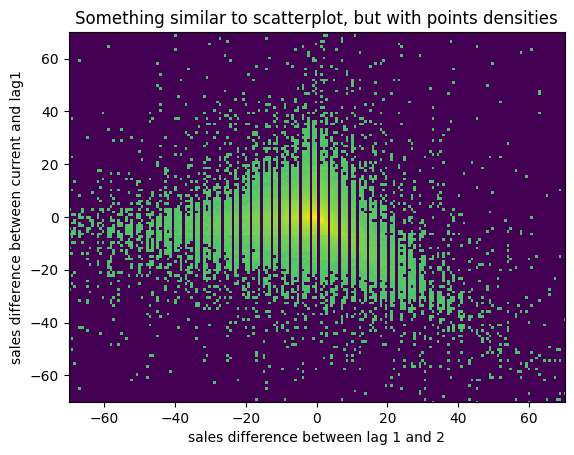

In [88]:

import matplotlib.colors as mcolors
plt.hist2d(df['cnt_difference_between_lag1_and_lag2'], df['cnt_difference_between_current_and_previous'], bins=3000, norm=mcolors.PowerNorm(0.03));
plt.xlim(-70,70)
plt.ylim(-70,70)
plt.xlabel('sales difference between lag 1 and 2')
plt.ylabel('sales difference between current and lag1')
plt.title('Something similar to scatterplot, but with points densities')
#The brighter the color - the more examples in this bin

In the plot below we can see, that different monthes have different mean sales, and this difference may reach 42% (between December and July) 

Text(0.5, 1.0, 'Sales per month')

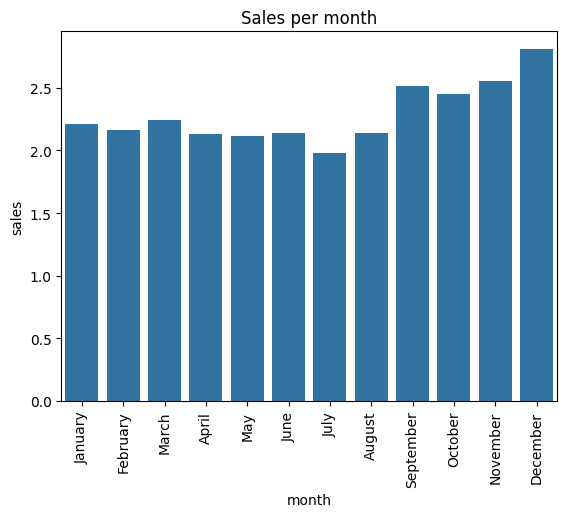

In [89]:
merged_monthes = merged.groupby('month').agg({'item_cnt_month':'mean'}).reset_index()

sns.barplot(x='month',y='item_cnt_month',data=merged_monthes)

plt.ylabel('sales')
plt.xlabel('month')
plt.xticks(ticks=[m for m in mapping.keys()],labels=[m[1] for m in mapping.values()], rotation='vertical');

plt.title('Sales per month')

Conclusion:
Main notes:
- Sales have deacreasing trend
- Price have increasing trend
- Target directly depends on following features:
    - shop
    - city
    - catgeory
    - super category

- Relationship between item sales and price changes between subseqent monthes is not random
- Sales have some seasonality
- Items that enter the market on avareage have the most sales